In [1]:
import pandas as pd
import sqlalchemy
from matplotlib import pyplot as plt
import datetime


In [2]:
db = sqlalchemy.engine.url.URL(drivername='mysql',
                               host='127.0.0.1',
                               database='sherman_1',
                               query={'read_default_file': '~/.my.cnf', 'charset': 'utf8'})
engine = sqlalchemy.create_engine(db)

In [3]:
df = pd.read_sql('''
    SELECT * FROM sherman_1.aware_device;
''' ,engine)

In [4]:
df['date'] = pd.to_datetime(df['timestamp'],unit='ms').dt.date

In [5]:
df = df[['device_id','date']]

In [6]:
def find_first_day(device_id, df_cleaned):
    df_target = df_cleaned[df_cleaned['device_id']==device_id]
    return min(df_target['date'])

In [7]:
first_day = {device_id: find_first_day(device_id, df)
             for device_id in set(df['device_id'].tolist())
             if find_first_day(device_id, df) >= datetime.date(year=2022, month=11, day=11)}


In [8]:
df = pd.DataFrame(first_day.items(),columns=['device_id', 'date'])
df

,device_id,date
0,0b610989-4adb-46ed-aa0f-1ad502f7dbd3,2022-12-05
1,b09ff4ae-575f-4bdb-b00b-9acd49246407,2022-12-07
2,b460f89e-fd76-46ff-a960-989d74fcb66a,2022-11-11
3,b97b9fda-6384-4f1c-a0b6-533272ecc2bb,2022-12-04
4,6965b966-d305-4743-b425-3f7b924293a4,2022-11-17
...,...,...
73,381fcfe1-d77b-4770-bc0e-90861799f23e,2022-12-06
74,d565193f-df85-4012-a747-0e415cf60f37,2022-12-14
75,84249fa7-bf40-4413-b9d3-b121ba70afb1,2022-12-14
76,6e4f1955-6d5a-4eb8-851c-7c0f61b1fc6b,2022-12-12


In [9]:
grouped = df.groupby('date')['device_id'].nunique()
m = grouped.mean()
print(m)

3.391304347826087


In [10]:
df['date']

0     2022-12-05
1     2022-12-07
2     2022-11-11
3     2022-12-04
4     2022-11-17
         ...    
73    2022-12-06
74    2022-12-14
75    2022-12-14
76    2022-12-12
77    2022-12-19
Name: date, Length: 78, dtype: object

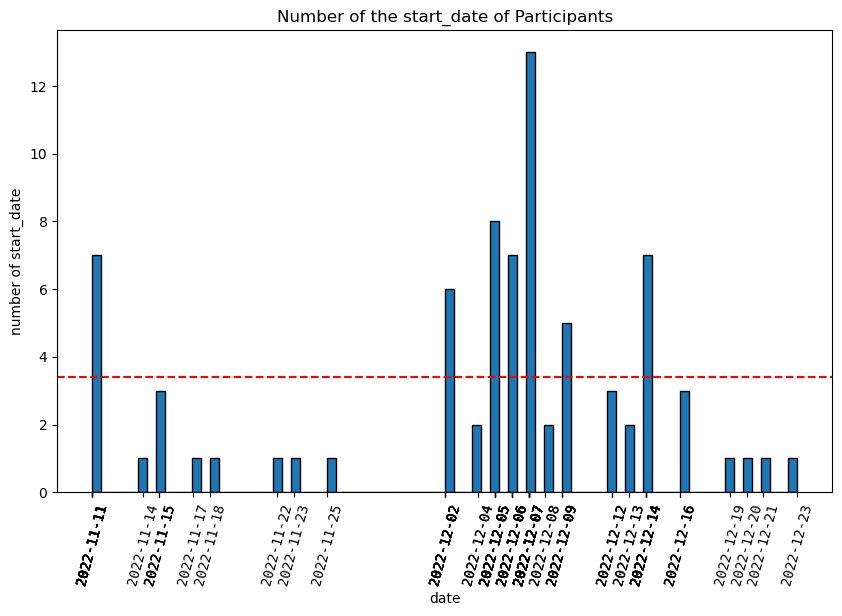

In [11]:
mylist = df['date']
fig = plt.figure(figsize=(10, 6))
plt.hist(mylist,bins=len(mylist),edgecolor='black')
plt.xlabel('date')
plt.ylabel('number of start_date')
plt.title('Number of the start_date of Participants')
plt.xticks(mylist,rotation=75,fontsize=10, fontweight='light', fontfamily='monospace')
plt.axhline(y=m, color='red', linestyle='--')
plt.show()